In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def discount_factor(r, t):
    ''' Function to calculate a discount factor.

    Parameters
    ==========
     r : float
         positive, constant short rate
     t : float, array of floats
         future date(s), in fraction of years;
         e.g. 0.5 means half a year from now

     Returns
    =======
    df : float
         discount factor
    '''
    df = np.exp(-r * t)
    # use of NumPy universal function for vectorization
    return df

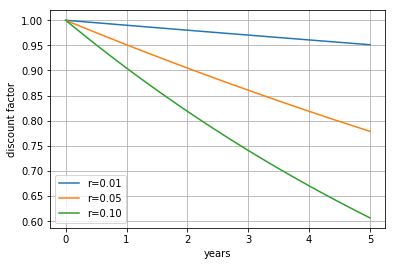

In [4]:
t = np.linspace(0, 5)

for r in [0.01, 0.05, 0.1]:
    plt.plot(t, discount_factor(r, t), label='r=%4.2f' % r, lw=1.5)
plt.xlabel('years')
plt.ylabel('discount factor')
plt.grid(True)
plt.legend(loc=0)

In [6]:
class short_rate(object):
    ''' Class to model a constant short rate object.

    Parameters
    ==========
    name : string
           name of the object
    rate : float
           positive, constant short rate

    Methods
    =======
    get_discount_factors :
           returns discount factors for given list/array
           of dates/times (as year fractions)
    '''

    def __init__(self, name, rate):
        self.name = name
        self.rate = rate

    def get_discount_factors(self, time_list):
        ''' time_list : list/array-like '''
        time_list = np.array(time_list)
        return np.exp(-self.rate * time_list)

In [7]:
sr = short_rate('r', 0.05)

In [8]:
sr.name, sr.rate

('r', 0.05)

In [9]:
time_list = [0.0, 0.5, 1.0, 1.25, 1.75, 2.0]  # in year fractions

In [10]:
sr.get_discount_factors(time_list)

array([ 1.        ,  0.97530991,  0.95122942,  0.93941306,  0.91621887,
        0.90483742])

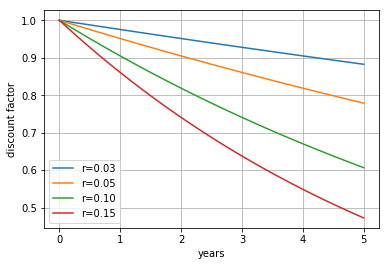

In [11]:
for r in [0.025, 0.05, 0.1, 0.15]:
    sr.rate = r
    plt.plot(t, sr.get_discount_factors(t),
             label='r=%4.2f' % sr.rate, lw=1.5)
    plt.xlabel('years')
    plt.ylabel('discount factor')
    plt.grid(True)
    plt.legend(loc=0)

In [12]:
import pandas as pd